# Hyperparameter Tuning


**Name**: Akash Kharita <br>
**Email**: ak287@uw.edu


## importing the dependencies

In [1]:
## importing the dependencies

import pygmt
import obspy 
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib 

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import time

from scipy.stats import pearsonr
import scipy.stats



### The purpose of this notebook is to tune the Random Forests hyperparameters

In [2]:

iq_lats = pd.read_csv('../Catalogs/icequakes_catalog.csv')['latitude']
iq_lons = pd.read_csv('../Catalogs/icequakes_catalog.csv')['longitude']

eq_lats = pd.read_csv('../Catalogs/earthquakes_catalog.csv')['latitude']
eq_lons = pd.read_csv('../Catalogs/earthquakes_catalog.csv')['longitude']

stns = pd.read_csv('../Catalogs/gmap-stations.txt', sep='|', skiprows=[2,6])


stations = stns.values[:,1].astype('str')
stn_lats = stns.values[:,2].astype('float')
stn_lons = stns.values[:,3].astype('float')
gl_lat, gl_lon = 61.219722, -146.895278

### Experiment for the ratio of the training and testing dataset that gives the best result. 

In [11]:
## Experiment for the ratio of the training and testing dataset that gives the best result. 
 
ratio = np.linspace(0.1, 0.9, 9)
acc_final = []
sens_final = []
spec_final = []
for i in tqdm(stations):
    acc = []
    sens = []
    spec = []
    for j in ratio:
        X1 = np.loadtxt("../tsfel_features/statistical/"+i+".txt") # statistical
        X2 = np.loadtxt("../tsfel_features/temporal/"+i+".txt") # temporal
        X3 = np.loadtxt("../tsfel_features/spectral/"+i+".txt") # spectral
        X = np.hstack([X1,X2,X3]) ## stacking all the features horizontally for a given event. 
        y = np.loadtxt("../tsfel_features/statistical/"+i+"_labels.txt")
        X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = j, random_state = 101)
        rf = RandomForestClassifier(n_estimators = 450, random_state=0)
        rf.fit(X_Train, y_Train)
        prediction = rf.predict(X_Test)  
        tn, fp, fn, tp = confusion_matrix(y_Test, prediction).ravel()
        spec.append(tn / (tn+fp))
        sens.append(tp / (tp+fn))
        acc.append(accuracy_score(prediction, y_Test))
    acc_final.append(acc)
    sens_final.append(sens)
    spec_final.append(spec)
        

100%|██████████| 15/15 [08:55<00:00, 35.67s/it]


### 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


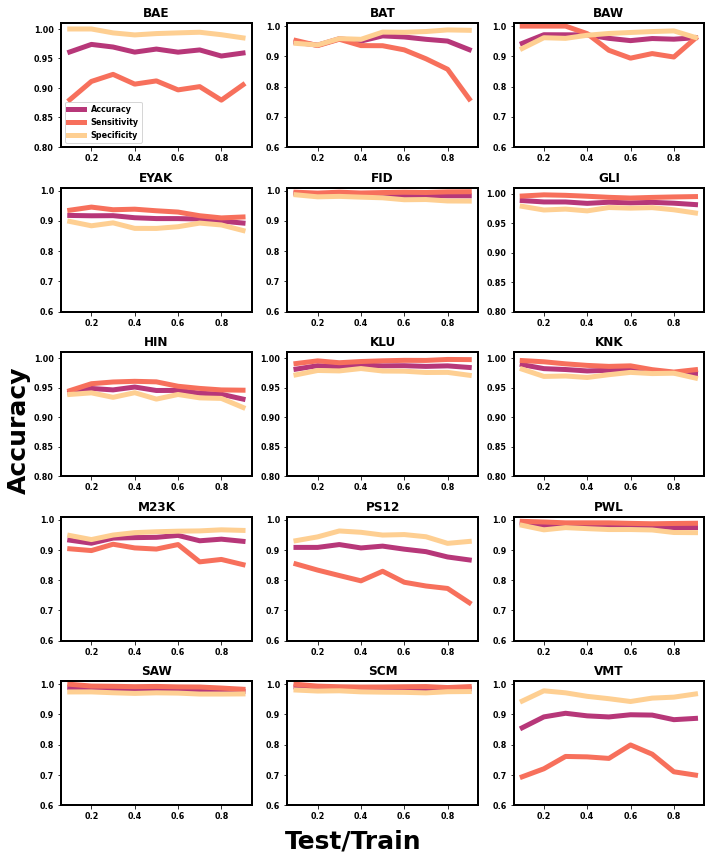

In [12]:
cmap = matplotlib.cm.get_cmap('magma')

c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)



accuracy_final = sens_final
plt.rcParams['axes.linewidth'] = 2

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

    
    
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[10,12], facecolor='white')
w = 0.1
plt.setp(ax, ylim=[0.6,1])

ax[0,0].plot(ratio, acc_final[0], linewidth = 5, color= c3, label = "Accuracy")
ax[0,0].plot(ratio, sens_final[0], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,0].plot(ratio, spec_final[0], linewidth = 5, color= c5, label = "Specificity")
ax[0,0].set_ylim(0.8,1.01)
ax[0,0].legend()


ax[0,1].plot(ratio, acc_final[1], linewidth = 5, color= c3, label = "Accuracy")
ax[0,1].plot(ratio, sens_final[1], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,1].plot(ratio, spec_final[1], linewidth = 5, color= c5, label = "Specificity")
ax[0,1].set_ylim(0.6,1.01)


ax[0,2].plot(ratio, acc_final[2], linewidth = 5, color= c3, label = "Accuracy")
ax[0,2].plot(ratio, sens_final[2], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,2].plot(ratio, spec_final[2], linewidth = 5, color= c5, label = "Specificity")
ax[0,2].set_ylim(0.6,1.01)

ax[1,0].plot(ratio, acc_final[3], linewidth = 5, color= c3, label = "Accuracy")
ax[1,0].plot(ratio, sens_final[3], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,0].plot(ratio, spec_final[3], linewidth = 5, color= c5, label = "Specificity")
ax[1,0].set_ylim(0.6,1.01)


ax[1,1].plot(ratio, acc_final[4], linewidth = 5, color= c3, label = "Accuracy")
ax[1,1].plot(ratio, sens_final[4], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,1].plot(ratio, spec_final[4], linewidth = 5, color= c5, label = "Specificity")
ax[1,1].set_ylim(0.6,1.01)


ax[1,2].plot(ratio, acc_final[5], linewidth = 5, color= c3, label = "Accuracy")
ax[1,2].plot(ratio, sens_final[5], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,2].plot(ratio, spec_final[5], linewidth = 5, color= c5, label = "Specificity")
ax[1,2].set_ylim(0.8,1.01)


ax[2,0].plot(ratio, acc_final[6], linewidth = 5, color= c3, label = "Accuracy")
ax[2,0].plot(ratio, sens_final[6], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,0].plot(ratio, spec_final[6], linewidth = 5, color= c5, label = "Specificity")
ax[2,0].set_ylim(0.8,1.01)

ax[2,1].plot(ratio, acc_final[7], linewidth = 5, color= c3, label = "Accuracy")
ax[2,1].plot(ratio, sens_final[7], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,1].plot(ratio, spec_final[7], linewidth = 5, color= c5, label = "Specificity")
ax[2,1].set_ylim(0.8,1.01)


ax[2,2].plot(ratio, acc_final[8], linewidth = 5, color= c3, label = "Accuracy")
ax[2,2].plot(ratio, sens_final[8], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,2].plot(ratio, spec_final[8], linewidth = 5, color= c5, label = "Specificity")
ax[2,2].set_ylim(0.8,1.01)


ax[3,0].plot(ratio, acc_final[9], linewidth = 5, color= c3, label = "Accuracy")
ax[3,0].plot(ratio, sens_final[9], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,0].plot(ratio, spec_final[9], linewidth = 5, color= c5, label = "Specificity")
ax[3,0].set_ylim(0.6,1.01)


ax[3,1].plot(ratio, acc_final[10], linewidth = 5, color= c3, label = "Accuracy")
ax[3,1].plot(ratio, sens_final[10], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,1].plot(ratio, spec_final[10], linewidth = 5, color= c5, label = "Specificity")
ax[3,1].set_ylim(0.6,1.01)


ax[3,2].plot(ratio, acc_final[11], linewidth = 5, color= c3, label = "Accuracy")
ax[3,2].plot(ratio, sens_final[11], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,2].plot(ratio, spec_final[11], linewidth = 5, color= c5, label = "Specificity")
ax[3,2].set_ylim(0.6,1.01)


ax[4,0].plot(ratio, acc_final[12], linewidth = 5, color= c3, label = "Accuracy")
ax[4,0].plot(ratio, sens_final[12], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,0].plot(ratio, spec_final[12], linewidth = 5, color= c5, label = "Specificity")
ax[4,0].set_ylim(0.6,1.01)

ax[4,1].plot(ratio, acc_final[13], linewidth = 5, color= c3, label = "Accuracy")
ax[4,1].plot(ratio, sens_final[13], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,1].plot(ratio, spec_final[13], linewidth = 5, color= c5, label = "Specificity")
ax[4,1].set_ylim(0.6,1.01)

ax[4,2].plot(ratio, acc_final[14], linewidth = 5, color= c3, label = "Accuracy")
ax[4,2].plot(ratio, sens_final[14], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,2].plot(ratio, spec_final[14], linewidth = 5, color= c5, label = "Specificity")
ax[4,2].set_ylim(0.6,1.01)






ax[0,0].set_title(stations[0], fontsize = 12, fontweight = 'bold')
ax[0,1].set_title(stations[1], fontsize = 12, fontweight = 'bold')
ax[0,2].set_title(stations[2], fontsize = 12, fontweight = 'bold')
ax[1,0].set_title(stations[3], fontsize = 12, fontweight = 'bold')
ax[1,1].set_title(stations[4], fontsize = 12, fontweight = 'bold')
ax[1,2].set_title(stations[5], fontsize = 12, fontweight = 'bold')
ax[2,0].set_title(stations[6], fontsize = 12, fontweight = 'bold')
ax[2,1].set_title(stations[7], fontsize = 12, fontweight = 'bold')
ax[2,2].set_title(stations[8],fontsize = 12, fontweight = 'bold')
ax[3,0].set_title(stations[9],fontsize = 12, fontweight = 'bold')
ax[3,1].set_title(stations[10],fontsize = 12, fontweight = 'bold')
ax[3,2].set_title(stations[11],fontsize = 12, fontweight = 'bold')
ax[4,0].set_title(stations[12],fontsize = 12, fontweight = 'bold')
ax[4,1].set_title(stations[13],fontsize = 12, fontweight = 'bold')
ax[4,2].set_title(stations[14],fontsize = 12, fontweight = 'bold')

fig.supxlabel('Test/Train', fontsize=25, fontweight='bold')
fig.supylabel('Accuracy', fontsize=25, fontweight='bold')
plt.tight_layout()

### Experiment for the ratio of the number of decision trees in the RF model that gives the best result. 

In [13]:
## Experiment for the ratio of the training and testing dataset that gives the best result. 
 
ratio = np.linspace(50, 1000, 20)
tracc_final = [] #treeaccuracy_final
trsens_final = []
trspec_final = []
for i in tqdm(stations):
    acc = []
    sens = []
    spec = []
    for j in ratio:
        X1 = np.loadtxt("../tsfel_features/statistical/"+i+".txt") # statistical
        X2 = np.loadtxt("../tsfel_features/temporal/"+i+".txt") # temporal
        X3 = np.loadtxt("../tsfel_features/spectral/"+i+".txt") # spectral
        X = np.hstack([X1,X2,X3]) ## stacking all the features horizontally for a given event. 
        y = np.loadtxt("../tsfel_features/statistical/"+i+"_labels.txt")
        X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)
        rf = RandomForestClassifier(n_estimators = int(j), random_state=0)
        rf.fit(X_Train, y_Train)
        prediction = rf.predict(X_Test)  
        tn, fp, fn, tp = confusion_matrix(y_Test, prediction).ravel()
        spec.append(tn / (tn+fp))
        sens.append(tp / (tp+fn))
        acc.append(accuracy_score(prediction, y_Test))
    tracc_final.append(acc)
    trsens_final.append(sens)
    trspec_final.append(spec)
        

100%|██████████| 15/15 [34:30<00:00, 138.01s/it]


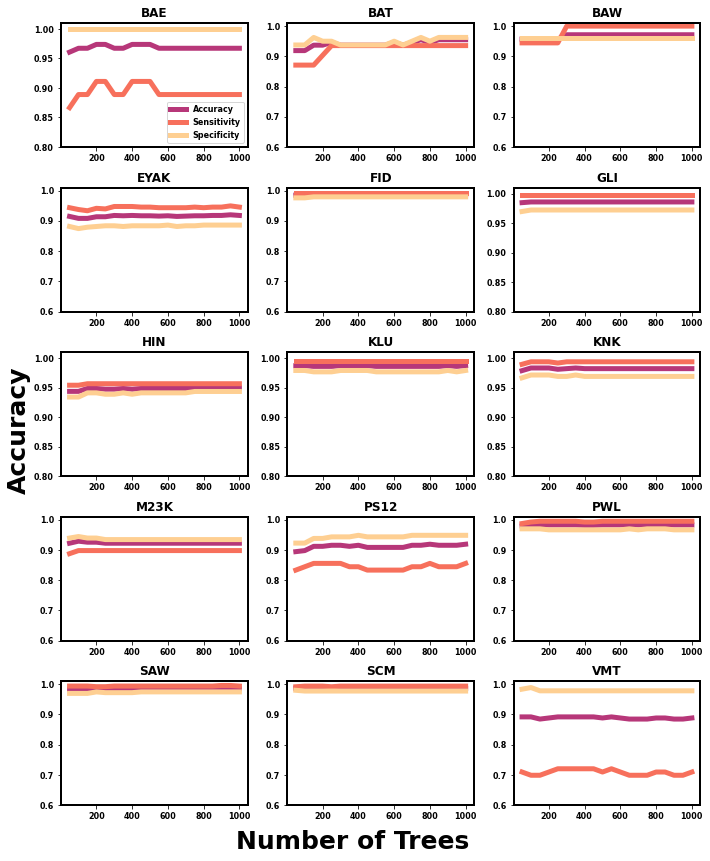

In [14]:
cmap = matplotlib.cm.get_cmap('magma')

c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)



accuracy_final = sens_final
plt.rcParams['axes.linewidth'] = 2

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

    
    
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[10,12], facecolor='white')
w = 0.1
plt.setp(ax, ylim=[0.6,1])

ax[0,0].plot(ratio, tracc_final[0], linewidth = 5, color= c3, label = "Accuracy")
ax[0,0].plot(ratio, trsens_final[0], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,0].plot(ratio, trspec_final[0], linewidth = 5, color= c5, label = "Specificity")
ax[0,0].set_ylim(0.8,1.01)
ax[0,0].legend()


ax[0,1].plot(ratio, tracc_final[1], linewidth = 5, color= c3, label = "Accuracy")
ax[0,1].plot(ratio, trsens_final[1], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,1].plot(ratio, trspec_final[1], linewidth = 5, color= c5, label = "Specificity")
ax[0,1].set_ylim(0.6,1.01)


ax[0,2].plot(ratio, tracc_final[2], linewidth = 5, color= c3, label = "Accuracy")
ax[0,2].plot(ratio, trsens_final[2], linewidth = 5, color= c4, label = "Sensitivity")
ax[0,2].plot(ratio, trspec_final[2], linewidth = 5, color= c5, label = "Specificity")
ax[0,2].set_ylim(0.6,1.01)

ax[1,0].plot(ratio, tracc_final[3], linewidth = 5, color= c3, label = "Accuracy")
ax[1,0].plot(ratio, trsens_final[3], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,0].plot(ratio, trspec_final[3], linewidth = 5, color= c5, label = "Specificity")
ax[1,0].set_ylim(0.6,1.01)


ax[1,1].plot(ratio, tracc_final[4], linewidth = 5, color= c3, label = "Accuracy")
ax[1,1].plot(ratio, trsens_final[4], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,1].plot(ratio, trspec_final[4], linewidth = 5, color= c5, label = "Specificity")
ax[1,1].set_ylim(0.6,1.01)


ax[1,2].plot(ratio, tracc_final[5], linewidth = 5, color= c3, label = "Accuracy")
ax[1,2].plot(ratio, trsens_final[5], linewidth = 5, color= c4, label = "Sensitivity")
ax[1,2].plot(ratio, trspec_final[5], linewidth = 5, color= c5, label = "Specificity")
ax[1,2].set_ylim(0.8,1.01)


ax[2,0].plot(ratio, tracc_final[6], linewidth = 5, color= c3, label = "Accuracy")
ax[2,0].plot(ratio, trsens_final[6], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,0].plot(ratio, trspec_final[6], linewidth = 5, color= c5, label = "Specificity")
ax[2,0].set_ylim(0.8,1.01)

ax[2,1].plot(ratio, tracc_final[7], linewidth = 5, color= c3, label = "Accuracy")
ax[2,1].plot(ratio, trsens_final[7], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,1].plot(ratio, trspec_final[7], linewidth = 5, color= c5, label = "Specificity")
ax[2,1].set_ylim(0.8,1.01)


ax[2,2].plot(ratio, tracc_final[8], linewidth = 5, color= c3, label = "Accuracy")
ax[2,2].plot(ratio, trsens_final[8], linewidth = 5, color= c4, label = "Sensitivity")
ax[2,2].plot(ratio, trspec_final[8], linewidth = 5, color= c5, label = "Specificity")
ax[2,2].set_ylim(0.8,1.01)


ax[3,0].plot(ratio, tracc_final[9], linewidth = 5, color= c3, label = "Accuracy")
ax[3,0].plot(ratio, trsens_final[9], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,0].plot(ratio, trspec_final[9], linewidth = 5, color= c5, label = "Specificity")
ax[3,0].set_ylim(0.6,1.01)


ax[3,1].plot(ratio, tracc_final[10], linewidth = 5, color= c3, label = "Accuracy")
ax[3,1].plot(ratio, trsens_final[10], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,1].plot(ratio, trspec_final[10], linewidth = 5, color= c5, label = "Specificity")
ax[3,1].set_ylim(0.6,1.01)


ax[3,2].plot(ratio, tracc_final[11], linewidth = 5, color= c3, label = "Accuracy")
ax[3,2].plot(ratio, trsens_final[11], linewidth = 5, color= c4, label = "Sensitivity")
ax[3,2].plot(ratio, trspec_final[11], linewidth = 5, color= c5, label = "Specificity")
ax[3,2].set_ylim(0.6,1.01)


ax[4,0].plot(ratio, tracc_final[12], linewidth = 5, color= c3, label = "Accuracy")
ax[4,0].plot(ratio, trsens_final[12], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,0].plot(ratio, trspec_final[12], linewidth = 5, color= c5, label = "Specificity")
ax[4,0].set_ylim(0.6,1.01)

ax[4,1].plot(ratio, tracc_final[13], linewidth = 5, color= c3, label = "Accuracy")
ax[4,1].plot(ratio, trsens_final[13], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,1].plot(ratio, trspec_final[13], linewidth = 5, color= c5, label = "Specificity")
ax[4,1].set_ylim(0.6,1.01)

ax[4,2].plot(ratio, tracc_final[14], linewidth = 5, color= c3, label = "Accuracy")
ax[4,2].plot(ratio, trsens_final[14], linewidth = 5, color= c4, label = "Sensitivity")
ax[4,2].plot(ratio, trspec_final[14], linewidth = 5, color= c5, label = "Specificity")
ax[4,2].set_ylim(0.6,1.01)






ax[0,0].set_title(stations[0], fontsize = 12, fontweight = 'bold')
ax[0,1].set_title(stations[1], fontsize = 12, fontweight = 'bold')
ax[0,2].set_title(stations[2], fontsize = 12, fontweight = 'bold')
ax[1,0].set_title(stations[3], fontsize = 12, fontweight = 'bold')
ax[1,1].set_title(stations[4], fontsize = 12, fontweight = 'bold')
ax[1,2].set_title(stations[5], fontsize = 12, fontweight = 'bold')
ax[2,0].set_title(stations[6], fontsize = 12, fontweight = 'bold')
ax[2,1].set_title(stations[7], fontsize = 12, fontweight = 'bold')
ax[2,2].set_title(stations[8],fontsize = 12, fontweight = 'bold')
ax[3,0].set_title(stations[9],fontsize = 12, fontweight = 'bold')
ax[3,1].set_title(stations[10],fontsize = 12, fontweight = 'bold')
ax[3,2].set_title(stations[11],fontsize = 12, fontweight = 'bold')
ax[4,0].set_title(stations[12],fontsize = 12, fontweight = 'bold')
ax[4,1].set_title(stations[13],fontsize = 12, fontweight = 'bold')
ax[4,2].set_title(stations[14],fontsize = 12, fontweight = 'bold')

fig.supxlabel('Number of Trees', fontsize=25, fontweight='bold')
fig.supylabel('Accuracy', fontsize=25, fontweight='bold')
plt.tight_layout()

### Searching for best hyperparameters using Randomized Grid Search 

### Hyperparameters currently in use

In [15]:
from pprint import pprint
rf = RandomForestClassifier(random_state=0)
print("Parameters currently in use: \n")
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]

# Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]

# Minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,4]

# Methods of selecting samples for training each tree (with/without replacement)
bootstrap = [True, False]



# Create the random grid 

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 
              'min_samples_split':min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950,
                  1000]}


In [17]:
## Test it for three stations with varying number of events - BAW, M23K and SCM. 
## Results BAW and M23K did not show improvements, SCM showed a very minor improvement of 0.15%

i = "BAW"
X1 = np.loadtxt("../tsfel_features/statistical/"+i+".txt") # statistical
X2 = np.loadtxt("../tsfel_features/temporal/"+i+".txt") # temporal
X3 = np.loadtxt("../tsfel_features/spectral/"+i+".txt") # spectral
X = np.hstack([X1,X2,X3]) ## stacking all the features horizontally for a given event. 
y = np.loadtxt("../tsfel_features/statistical/"+i+"_labels.txt")
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [18]:
starttime = time.time()
## Use the randomm grid to search for best hyperparameters 

# First create the base model to tune

rf = RandomForestClassifier(random_state=0)


# Random search of parameters , using a 3-fold cross validation, 
# Search across 100 different combinations, and use all the cores n_jobs = -1

rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_Train, y_Train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 95

In [19]:
### display the combination of parameters that gave the best results
rf_random.best_params_

{'n_estimators': 850,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 90,
 'bootstrap': False}

In [20]:
## Compare the performance with base model
base_model = RandomForestClassifier(n_estimators = 50, random_state=0)
base_model.fit(X_Train, y_Train)
prediction = base_model.predict(X_Test)
base_accuracy = accuracy_score(prediction, y_Test)
print('Random Accuracy with base hyperparameters:',base_accuracy)


best_random = rf_random.best_estimator_
best_random.fit(X_Train, y_Train)
prediction = best_random.predict(X_Test)
random_accuracy = accuracy_score(prediction, y_Test)
print('Random Accuracy with best hyperparameters:', random_accuracy)


print('Improvement of {:0.2f}%.'.format( 100*(random_accuracy -base_accuracy) / base_accuracy))

Random Accuracy with base hyperparameters: 0.957142857143
Random Accuracy with best hyperparameters: 0.942857142857
Improvement of -1.49%.


In [21]:
starttime = time.time()
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [400, 450, 500, 550]
}# Create a based model
rf = RandomForestClassifier(random_state=0)# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

endtime = time.time() - starttime

print(endtime-starttime)

-1681017900.868957


In [22]:
starttime =  time.time()
grid_search.fit(X_Test, y_Test)

print(time.time()-starttime)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
12.671647548675537


In [23]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [24]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_Train, y_Train)
prediction = best_grid.predict(X_Test)
grid_accuracy = accuracy_score(prediction, y_Test)

In [25]:
print('Improvement of {:0.2f}%.'.format( 100*(grid_accuracy -base_accuracy) / base_accuracy))

Improvement of 1.49%.
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=650; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   1.2s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=950; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=350; total time=   1.3s
[CV] END bootst